In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import aa_gun
import strategy_imitation, sarsa
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt


EPISODES = 30000

In [2]:
# In case of CartPole-v1, maximum length of episode is 500
#env = aa_gun.AA_gun_simple0_env()
#env = gym.make('AirRaid-ram-v0')
#env = gym.make('Robotank-ramNoFrameskip-v0')
env = gym.make('Seaquest-ramNoFrameskip-v0')
#env=CartPoleEnv9()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

#agent = DoubleDQNAgent(state_size, action_size)
agent = sarsa.SarsaAgent(state_size, action_size)
agent.train_start=3000
#agent = strategy_imitation.ImitAgent(state_size, action_size)
agent.render=True

scores, episodes = [], []
reward_lst = []
s_list=[]
a_list=[]

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        if (e in range(100,300)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
            if agent.render:
                env.render()

        # get action for the current state and go one step in environment
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action make the episode end, then gives penalty of -100
        

        # save the sample <s, a, r, s'> to the replay memory
        reward_curr=reward
        #if done:
        #    reward_curr -= 100
        agent.append_sample(state, action, reward_curr, next_state, done)
        #if next_state[0,11]!=reward:
        #    print('state[13]!=reward',state[0,11],reward)
        #
        s_list.append(state)
        a_list.append(action)
        reward_lst.append(reward)
        #
        
        # every time step do the training
        agent.train_model()
        score += reward
        state = next_state
        
        print(state)

        if done:
            # every episode update the target model to be same with model
            agent.update_target_model()

            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            #pylab.savefig("./save_graph/aa_gun_dqn.png")
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon)

            # if the mean of scores of last 10 episode is bigger than 490
            # stop training

    # save the model
    #if e % 50 == 0:
    #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

[[  0  87  42   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  212 253   0 253  86 253 178 253  80 254   0 254   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1  13   0 255 255   0  10   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  96   7   0   0  97 215 254
  214 244]]
[[  0  88  83   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  212 253   0 253  86 253 178 253  80 254   0 254   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  13   0 255 255   0  11   0   1   0   0   0
    0   0   0   0   0   0 

[[  0  83 182   0   9   0 255  26 175 144  24 170 132   0  12   6  50 134
  216 253  41 253  86 253 178 253  80 254   0 254 161 222 222 222   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1 255 255   3 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0  84   0
    0  27  27 229  96  48  32   3   6   0   0   0   0   0   8   8   0   8
    0   0   0   4   0   0   1  33   0 255 255   0  61   2   0   0   0   0
    0  12   0   0   0   0   0   1   1   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  84 182   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  217 253  41 253  86 253 178 253  80 254   0 254 161 222 222 222   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1 255 255   3 255
  255   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0  84   0
    0  27  27 229  96  48  32   6  12   0   0   0   0   0   8   8   0   8
    0   0   0   5   0   0   0  33   0 255 255   0  61   0   0   0   0   0
    0  11   0   0   0   0 

[[  0  83   9   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  234 253  56 253 100 253 164 253  80 254   0 254 208 208 208 208   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32  12   8   0   0   0   0   0   0   8   0   9
    1   0   0   7   1   0   0  13   0 255 255   0  25   0   1   0   0   0
    0  12   0   0   0   0   0   1   1   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  84   9   0  10   0 255  26 175 144  24 170 132   0  12   6  50 134
  234 253  56 253 100 253 164 253  80 254   0 254 208 208 208 208   0   0
    4   1   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32  12   8   0   0   0   0   0   0   8   0   9
    1   0   0   7   1   0   2  13   0 255 255   0  26   0   1   0   0   0
    0  12   0   0   0   0 

[[  0  78 236   0  11   0 255  26 175 144  24 170 132   0  12   6  50 134
  230 253  13 253 100 253 164 253  80 254   0 254 233 150 233 233   0   0
    1   4   1   1   1   4   1   1 200 200 200 200 255 255 255 255 255 255
  255   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0  95   0
    0  33  33  38 208  48  32   6  12   0   0   0   0   0   8   8   0   1
    9   1   1   3   1   0   0  27   0 255 255   0  60  94   0   0   0   0
    0  16   0   0   0   0   0   1   1   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  79 236   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  230 253  13 253 100 253 164 253  80 254   0 254 234 149 234 234   0   0
    1   4   1   1   1   4   1   1 200 200 200 200 255 255 255 255 255 255
  255   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0  96   0
    0  33  33  22 192  48  32   9   2   0   0   0   0   0   0   8   0   1
    9   1   1   3   1   0   0  26   0 255 255   0  60  89   0   0   0   0
    0  16   0   0   0   0 

[[  0  72 221   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  230 253  13 253 100 253 178 253  16 254   0 254 208 208 208 208   0   0
    1   4   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0  32   1   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32  12   8   0   0   0   0   0   0   0   0   1
    9   0   1   3   1   0   0  13   0 255 255   0  30   0   1   0   0   0
    0  11   0   0   0   0   0   1   1   0   0  96   7   0   3  97 215 254
  136 246]]
[[  0  73 221   0   7   0 255  26 175 144  24 170 132   0  12   6  50 134
  230 253  13 253 100 253 164 253  16 254   0 254 208 208 208 208   0   0
    1   4   1   1   0   0   0   0 200 200 200 200   0   1   2   3 255 255
  255   0   0   0  32   1   0   0   0   0   0   0   0   0   0   0  76   0
    0   0   0 101  96  48  32  12   8   0   0   0   0   0   0   0   0   1
    9   0   1   3   1   0   0  13   0 255 255   0  30   0   1   0   0   0
    0  11   0   0   0   0 

[[  0  56  39   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  213 253   0 253  86 253 178 253  16 254   0 254 233 233 233 150   0   0
    1   1   1   4   1   1   1   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  32   1   0   0   0   0   0   0   0   0   0   0  67   0
    0  33 127   4 208  48  32   0   0   0   0   0   0   0   0   0   0   0
    0   0   8   1   0   0   0  36   0 255 255   0  59  93   0   0   0   0
    0  15   0   0   0   0   0   1   1   0   0  96   7   0   3  97 215 254
  136 246]]
[[  0  57  39   0   7   0 255  26 175 144  24 170 132   0  12   6  50 134
  213 253   0 253  86 253 164 253  16 254   0 254 233 233 233 150   0   0
    1   1   1   4   1   1   1   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  32   1   0   0   0   0   0   0   0   0   0   0  68   0
    0  33 127 244 208  48  32   3   6   0   0   0   0   0   0   0   0   0
    0   0   8   1   0   0   0  36   0 255 255   0  59  98   0   0   0   0
    0  15   0   0   0   0 

[[  0  41 234   0   9   0 255  26 175 144  24 170 132   0  12   6  50 134
  217 253   0 253  86 253 164 253  32 254   0 254  67  67  67 135   0   0
    1   1   1   4   1   1   1   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   0  64   1   0   0   0   0   0   0   0   0   0   0  41   0
    0 105  82 194 214  48  32   3   6   0   0   0   0   0   8   8   0   0
    0  16   8   5   0   0   0  42   0 255 255   0  51   0   0   0   0   0
    0  13   0   0   0   0   0   1   1   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  42 234   0  11   0 255  26 175 144  24 170 132   0  12   6  50 134
  217 253   0 253  86 253 164 253  32 254   0 254  67  67  67 135   0   0
    1   1   1   4   1   1   1   4 200 200 200 200 255 255   2 255 255 255
  255   0   0   0  64   1   0   0   0   0   0   0   0   0   0   0  40   0
    0 105  82 210 214  48  32   6  12   0   0   0   0   0   8   8   0   0
    0  17   8   5   0   0   0  42   0 255 255   0  51   0   0   0   0   0
    0  13   0   0   0   0 

[[  0  36  83   0  14   0 255  26 175 144  24 170 132   0  12   6  50 134
  178 253   0 253 204 253 178 253  48 254   0 254 214 214 214 146   0   0
    1   1   1   4   0   0   0   4   8   8   8 200   0   1   2 255 255 255
  255   0   0   0  96   1   0   0   1   0   0   0   0   0   0   0  49   0
    0   0   0  51  96  48  32   4   8   0   0   0   0   0   0   8   0  13
   13  13  10   6   2   0   0  51   0 255 255   0  43   1   0   0   0   0
    0  13   0   0   0   0   0   0 255   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  37  83   0  14   0 255  26 175 144  24 170 132   0  12   6  50 134
  164 253   0 253 204 253 164 253  48 254   0 254 214 214 214 146   0   0
    1   1   1   4   0   0   0   4   8   8   8 200   0   1   2 255 255 255
  255   0   0   0  96   1   0   0   1   0   0   0   0   0   0   0  49   0
    0   0   0  51  96  48  32   7  14   0   0   0   0   0   0   8   0  12
   12  12  10   6   2   0   0  50   0 255 255   0  43   0   0   0   0   0
    0  13   0   0   0   0 

[[  0  36 176   0   7   0 255  26 175 144  24 170 132   0  12   6  50 134
  164 253   0 253 204 253 164 253  48 254   0 254 118 118 118  50   0   0
    1   1   1   4   1   1   1   4   8   8   8 200 255 255 255 255 255 255
  255   0   0   0  96   1   0   0   1   0   0   0   0   0   0   0  64   0
    0   0   0  52 106  48  32   4   8   0   0   0   0   0   0   0   0  12
   12  12   8   6   0   0   2  49   0 255 255   0  35  94   0   0   0   0
    0  14   0   0   0   0   0   0 255   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  37 176   0  14   0 255  26 175 144  24 170 132   0  12   6  50 134
  192 253   0 253 204 253 192 253  48 254   0 254 118 118 118  50   0   0
    1   1   1   4   1   1   1   4   8   8   8 200 255 255 255 255 255 255
  255   0   0   0  96   1   0   0   1   0   0   0   0   0   0   0  64   0
    0   0   0  52 106  48  32   7  14   0   0   0   0   0   0   0   0  14
   14  14   8   6   0   0   2  48   0 255 255   0  35  99   0   0   0   0
    0  14   0   0   0   0 

[[  0  31   9   0  11   0 255  26 175 144  24 170 132   0  12   6  50 134
  164 253   0 253 204 253 164 253  64 254   0 254  24  24  24 142   0   0
    1   1   1   4   1   1   1   4   8   8   8 200 255 255 255 255 255 255
  255   0   0   0 128   1   0   0   1   0   0   0   0   0   0   0  68  16
   16  16   0 244 179  33  32   5  10   0   0   0   0   0   8   8   0  12
   12  12  10   7   2   0   0  49   0 255 255   0  28  71   0   0   0   0
    0  16   0   0   0   0   0   0 255   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  32  74   0  10   0 255  26 175 144  24 170 132   0  12   6  50 134
  164 253   0 253 204 253 164 253  64 254   0 254  23  23  23 141   0   0
    1   1   1   4   1   1   1   4   8   8   8 200 255 255 255 255 255 255
  255   0   0   0 128   1   0   0   1   0   0   0   0   0   0   0  67  15
   15  15   0   4 195  49  32   8   0   0   0   0   0   0   8   8   0  12
   12  12   9   7   1   0   2  48   0 255 255   0  27  66   0   0   0   0
    0  15   0   0   0   0 

[[  0  29 100   0  10   0 255  26 175 144  24 170 132   0  12   6  50 134
  219 253   0 253  86 253 192 253   0 254   0 254 206 206 145  47   0   0
    1   1   4   4   0   0   4   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   1   0   1   0   0   1   0   0   0   0   0   0   0  32  20
   20 125   0  82  96 225  32  15  14   0   0   0   0   0   8   0   0   0
    0   8   8   7   0   0   2  45   0 255 255   0  20 136   0   0   0   0
    0  11   0   0   0   1   1   1 255   0   0  96   7   0   3  97 215 254
  214 244]]
[[  0  30 100   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  219 253   0 253  86 253 192 253   0 254   0 254 207 207 144  46   0   0
    1   1   4   4   0   0   4   4 200 200 200 200 255 255 255 255 255 255
  255   0   0   1   0   1   0   0   1   0   0   0   0   0   0   0  32  21
   21 124   0  82  96 209  32   2   4   0   0   0   0   0   8   0   0   0
    0   8   8   7   0   0   2  45   0 255 255   0  20 141   0   0   0   0
    0  11   0   0   0   1 

[[  0  14 123   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  230 253  13 253 100 253 192 253  32 254   0 254  41  41 204 204   0   0
    1   1   4   4   1   1   0   0 200 200 200   8   0   1 255   3 255 255
  255   0   0   1  64   1   0   0   1   0   0   0   0   0   0   0  44  77
   77  79   0 146 148  21  32   2   4   0   0   0   0   0   0   0   0  17
   17   8  14   3   0   0   2  48   0 255 255   0  12 143   0   0   0   1
    1  12   0   0   0   1   1   1 255   0   0  96   7  15   3  97 215 254
  214 244]]
[[  0  15 123   0   6   0 255  26 175 144  24 170 132   0  12   6  50 134
  230 253  13 253 100 253 192 253  32 254   0 254  41  41 204 204   0   0
    1   1   4   4   1   1   0   0 200 200 200   8   0   1 255   3 255 255
  255   0   0   1  64   1   0   0   1   0   0   0   0   0   0   0  45  77
   77  79   0 115 148  21  32   5  10   0   0   0   0   0   0   0   0  17
   17   8  14   3   0   0   2  47   0 255 255   0  12 148   0   0   0   1
    1  12   0   0   0   1 

Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 157.8376
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 157.6160
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 151.5669
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 152.3533
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 148.9395
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 146.7781
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 145.4248
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 144.0391
Epoch 1/2
1/1 [==============================] - 0s 777us/step - loss: 138.7400
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 138.5731
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 141.5236
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 139.8878
Epoch 1/2
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 121.9362
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 120.9515
Epoch 1/2
1/1 [==============================] - 0s 974us/step - loss: 118.3503
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 120.7171
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 119.8073
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 117.8240
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 118.0319
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 113.5266
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 115.7312
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 116.5225
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 33.7958
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 34.6629
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 32.72

1/1 [==============================] - 0s 1ms/step - loss: 40.2934
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 41.1687
Epoch 1/2
1/1 [==============================] - 0s 801us/step - loss: 40.5962
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 40.8368
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 41.6240
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 41.0739
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 40.3266
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 38.9555
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 40.4206
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 39.8267
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 38.9308
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 38.2292
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 38.0565
Epoch 2

1/1 [==============================] - 0s 1ms/step - loss: 14.8709
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 15.5885
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 15.7522
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 15.3475
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 15.2393
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 14.9060
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 15.0363
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 14.5795
Epoch 2/2
1/1 [==============================] - 0s 973us/step - loss: 14.1226
delta_r 3.51724875368478 r 7.061688131327479
[[  0   0  39   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  212 253   0 253  86 253 192 253  48 254   0 254 132 132 205 113   1   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 55.7683
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 51.5187
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 55.2090
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 55.2454
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 50.0788
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 48.8498
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 50.1492
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 47.8112
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 50.1764
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 51.9238
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 49.2973
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 45.5665
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 49.2188

1/1 [==============================] - 0s 980us/step - loss: 34.2424
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 31.8195
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 34.4091
Epoch 1/2
1/1 [==============================] - 0s 962us/step - loss: 33.3652
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 33.2211
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 31.0780
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 31.2353
Epoch 1/2
1/1 [==============================] - 0s 818us/step - loss: 31.8339
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 29.4642
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 12.8985
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 13.2852
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 13.6100
Epoch 2/2
1/1 [==============================] - 0s 934us/step - loss: 13.3947
E

1/1 [==============================] - 0s 1ms/step - loss: 32.5682
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 32.9467
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 32.6399
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 32.8362
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 31.8635
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 31.0605
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 31.4450
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 30.4917
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 30.9981
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 30.8790
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 30.1466
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 30.0272
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 30.3480
Epoch 2/2

1/1 [==============================] - 0s 1ms/step - loss: 19.6185
Epoch 1/2
1/1 [==============================] - 0s 984us/step - loss: 19.4952
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 20.1755
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 19.1973
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 19.9996
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 19.5432
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 18.6872
delta_r 3.146022055504514 r 6.967290608079016
[[  0   9  56   0   5   0 255  26 175 144  24 170 132   0  12   6  50 134
  214 253   0 253  86 253 192 253  48 254   0 254 135 135 202 110   0   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  61   0
    0   0  82 100  96  48  32   3   6   0   0   0   0   0   0   0   0  16
   16   9  14   2   1   0   2  65   0 255 255   0   4

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 20.7563
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 18.8826
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 18.7090
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 18.4802
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 18.3897
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 16.4462
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 17.8909
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 18.6996
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 16.9452
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 16.7945
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 16.3812
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 17.5328
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 17.4777

1/1 [==============================] - 0s 1ms/step - loss: 18.3171
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 18.8977
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 16.4136
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 17.7587
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 18.8113
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 17.8151
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 17.4753
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 18.0788
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 17.0866
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 7.4829
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 7.6581
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 7.4192
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 7.2843
Epoch 1/2
1/1

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 15.6300
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 14.3951
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 4.9683
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 4.7366
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 5.0262
Epoch 2/2
1/1 [==============================] - 0s 985us/step - loss: 4.8963
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 5.1942
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 5.0580
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 5.0210
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 4.6761
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 4.7196
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 4.6587
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 4.9663
Epoch 2/

1/1 [==============================] - 0s 1ms/step - loss: 4.1931
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 4.1148
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.9718
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 4.1090
delta_r 2.087645484461657 r 7.103398273973945
[[  0  20 199   0  11   0 255  26 175 144  24 170 132   0  12   6  50 134
  217 253   0 253  86 253 164 253  48 254   0 254 139 139 198 106   0   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  55   0
    0   0  71 211  96  48  32   4   8   0   0   0   0   0   8   0   0  16
   16   8  12   5   0   0   2  66   0 255 255   0   4  91   0   0   0   1
    1  14   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  214 244]]
Epoch 1/2
1/1 [==============================] - 0s 979us/step - loss: 16.3401
Epoch 2/2
1/1 [==============================] - 0s

1/1 [==============================] - 0s 1ms/step - loss: 3.9040
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.9705
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.8260
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.7051
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.8989
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.4677
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.7459
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.8764
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.4748
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.8757
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.7006
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.5256
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.5194
Epoch 1/2
1/1 [=======

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 14.4069
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 14.3276
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2090
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.1152
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.9673
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.0091
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.0623
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.0434
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.9317
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8977
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.0103
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8108
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.9426
Epoch 2/2


1/1 [==============================] - 0s 1ms/step - loss: 3.5754
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.5888
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.6894
Epoch 2/2
1/1 [==============================] - 0s 958us/step - loss: 3.6348
delta_r 2.1130200241164165 r 7.340072718873767
[[  0  31  63   0  13   0 255  26 175 144  24 170 132   0  12   6  50 134
  234 253  13 253 100 253 164 253  48 254   0 254 143 143 194 102   0   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  54   0
    0   0  60 227  96  48  32   5  10   0   0   0   0   0   8   0   0  17
   17  10  12   7   2   0   0  74   0 255 255   0   4 146   0   0   0   1
    1  12   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  214 244]]
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 13.9706
Epoch 2/2
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 3.4136
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.5951
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.4973
Epoch 1/2
1/1 [==============================] - 0s 951us/step - loss: 3.3630
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.5343
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.4907
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.3676
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.3758
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2641
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.4976
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2734
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.1800
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.1066
Epoch 1/2
1/1 [=====

Epoch 1/2
1/1 [==============================] - 0s 945us/step - loss: 15.0739
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 13.9550
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.1505
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 3.1408
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.1743
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.9075
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2086
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.7697
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2081
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8568
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8963
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.9754
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.9234
Epoch 2/

1/1 [==============================] - 0s 1ms/step - loss: 2.1677
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1674
Epoch 1/2
1/1 [==============================] - 0s 853us/step - loss: 2.1705
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.2594
delta_r 1.7920620739519275 r 6.9206208247334615
[[  0  42 240   0  13   0 255  26 175 144  24 170 132   0  12   6  50 134
  232 253  13 253 100 253 164 253  48 254   0 254 147 147 190  98   0   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  51   0
    0   0  49  19  96  48  32   6  12   0   0   0   0   0   8   8   0  17
   17   8  12   5   0   0   0  84   0 255 255   0   3  20   0   0   0   1
    1  14   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  214 244]]
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 15.2734
Epoch 2/2
1/1 [==============================] - 

1/1 [==============================] - 0s 1ms/step - loss: 3.0094
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2223
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.1184
Epoch 1/2
1/1 [==============================] - 0s 860us/step - loss: 2.8780
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.4797
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2002
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 3.0816
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.9816
Epoch 2/2
1/1 [==============================] - 0s 990us/step - loss: 2.8901
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.1666
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.9042
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.9417
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8809
Epoch 1/2
1/1 [===

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 14.6990
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 15.4023
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.8350
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.7785
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.9876
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 3.5759
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 3.7606
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.3280
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.1170
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.5380
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.5911
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 3.2956
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 3.5333
Epoch 2/2


1/1 [==============================] - 0s 1ms/step - loss: 2.8591
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8447
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8432
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6272
delta_r 2.1630428787696547 r 7.377452271633837
[[  0  53 131   0  13   0 255  26 175 144  24 170 132   0  12   6  50 134
  214 253   0 253  86 253 164 253  48 254   0 254 151 151 186  94   0   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  51   0
    0   0  38  19  96  48  32   7  14   0   0   0   0   0   8   8   0  16
   16  10  12   2   2   0   0  95   0 255 255   0   3  24   0   0   0   1
    1  14   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  214 244]]
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 14.9867
Epoch 2/2
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 953us/step - loss: 2.7173
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.7838
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.7917
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.3680
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 2.6234
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.5203
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6110
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6579
Epoch 2/2
1/1 [==============================] - 0s 974us/step - loss: 2.6910
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.5809
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6137
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.6175
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 2.3907
Epoch 1/2
1/1 [===

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 13.8000
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 14.9146
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.4682
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.4404
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.5597
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.5674
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.2554
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 2.3520
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.5071
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.5320
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.5852
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1214
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.3665
Epoch 2/2


1/1 [==============================] - 0s 2ms/step - loss: 2.0063
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1181
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.3832
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 2.2862
delta_r 1.8347837573989405 r 7.615148708663783
[[  0  64 231   0  15   0 255  26 175 144  24 170 132   0  12   6  50 134
  212 253   0 253  86 253 178 253  48 254   0 254 156 156 181  89   0   0
    1   1   4   4   0   0   0   4 200 200 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  51   0
    0   0  27  19  96  48  32   8   0   0   0   0   0   0   8   8   0  16
   16   8  13   0   0   0   0 102   0 255 255   0   2  29   0   0   0   1
    1  14   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  136 246]]
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 14.1280
Epoch 2/2
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 2ms/step - loss: 1.8366
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.8631
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7887
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 1.9014
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7760
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.8482
Epoch 2/2
1/1 [==============================] - 0s 936us/step - loss: 1.8047
Epoch 1/2
1/1 [==============================] - 0s 834us/step - loss: 1.8995
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7477
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7083
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7522
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 1.7871
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7390
Epoch 1/2
1/1 [===

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 13.2911
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 13.2822
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.2787
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.3028
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1623
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1914
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.2984
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1722
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1019
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.9969
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.1052
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.2694
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.8842
Epoch 2/2


1/1 [==============================] - 0s 953us/step - loss: 2.1346
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1169
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.0408
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.2932
delta_r 1.831784822022323 r 7.3935113456537245
[[  0  75  62   0  13   0 255  26 175 144  24 170 132   0  12   6  50 134
  164 253   0 253 204 253 178 253  48 254   0 254 215 215 177  85   0   0
    1   1   4   4   0   0   0   4   8   8 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  51   0
    0   0  16  19  96  48  32   9   2   0   0   0   0   0   8   8   0  12
   12  10  13   2   2   0   1 108   0 255 255   0   2  34   0   0   0   1
    1  15   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  214 244]]
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 13.0122
Epoch 2/2
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 2.0136
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.0649
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.8583
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 1.8863
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.8767
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.0476
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.0911
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.9885
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7993
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.9350
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.9745
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 1.7962
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7571
Epoch 1/2
1/1 [=======

Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 10.4803
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 12.9648
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.7812
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.8337
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.7479
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6228
Epoch 1/2
1/1 [==============================] - 0s 828us/step - loss: 2.5375
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6390
Epoch 1/2
1/1 [==============================] - 0s 897us/step - loss: 2.7996
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6154
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.6197
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 2.6919
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.6268
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 1.9863
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.8507
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.9609
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 1.8208
delta_r 1.740348178282666 r 7.307673044301015
[[  0  86 246   0  13   0 255  26 175 144  24 170 132   0  12   6  50 134
  178 253   0 253 204 253 178 253  48 254   0 254 211 211 173  81   0   0
    1   1   4   4   0   0   0   4   8   8 200   8   0   1   2 255 255 255
  255   0   0   1  96   1   0   0   2   0   0   0   0   0   0   0  51   0
    0   0   5  19  96  48  32  10   4   0   0   0   0   0   8   8   0  13
   13   9  13   5   1   0   1 108   0 255 255   0   2  39   0   0   0   1
    1  15   0   0   0   0   0 255 255   0   0  96   7  15   3  97 215 254
  214 244]]
Epoch 1/2
1/1 [==============================] - 0s 942us/step - loss: 12.5581
Epoch 2/2
1/1 [==============================] - 0s

1/1 [==============================] - 0s 961us/step - loss: 1.4322
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.7057
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.5243
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.6747
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.6366
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.6695
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.5222
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.5048
Epoch 2/2
1/1 [==============================] - 0s 1ms/step - loss: 1.5966
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 1.4390
Epoch 2/2
1/1 [==============================] - 0s 2ms/step - loss: 1.5774
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 1.6048
Epoch 2/2
1/1 [==============================] - 0s 4ms/step - loss: 1.5042
Epoch 1/2
1/1 [=====

KeyboardInterrupt: 

In [5]:
def make_sar_table(s,a,r):
    #print(np.array(a,ndmin=2).T.shape)
    #print(np.array(r,ndmin=2).T.shape)
    #print(np.array(s,ndmin=2)[:,0,:].shape)
    return np.hstack( (np.array(s,ndmin=2)[:,0,:],np.array(a,ndmin=2).T,np.array(r,ndmin=2).T) )

0.003353658536585366


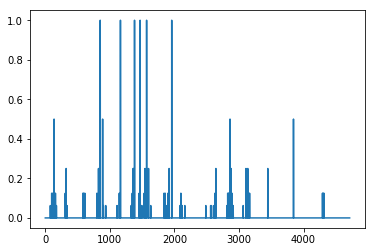

In [6]:
import matplotlib.pyplot as plt
print(np.mean(reward_lst))
plt.plot(reward_lst)

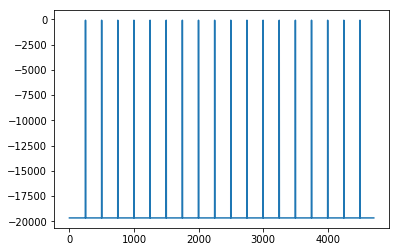

In [8]:
plt.plot(agent.r_disco)
#plt.plot(agent.d*20)

In [ ]:
np.mean(reward_lst)

In [ ]:
np.mean(score)

In [ ]:
#Чтобы анализировать разрешимость задачи
def replicate_reward(sar,border=0,wanted_part=0.5):
    part = np.mean(sar[:,-1:]>border)
    if part==0:
        print('ERROR')
        return(sar)
    else:
        while part<wanted_part:
            sar=np.vstack((sar,sar[np.where(sar[:,-1:]>border)[0],:]))
            part = np.mean(sar[:,-1:]>border)
        print(part)
        return(sar)

In [ ]:
sar=make_sar_table(s_list,a_list,reward_lst)
sar=replicate_reward(sar)
X=sar[1:,:]
Y=sar[:-1,:]
Y=sar[:-1,-1:]
Y=sar[1:,-1:]
sar_width=X.shape[1]
nn = Sequential()
nn.add(Dense(200, input_dim=sar_width, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
#nn.add(Dense(sar_width, activation='linear',
#                kernel_initializer='he_uniform'))
nn.add(Dense(1, activation='linear',
                kernel_initializer='he_uniform'))

nn.summary()
nn.compile(loss='mse', optimizer=Adam(lr=0.001))
l=X.shape[0]
X_train=X[:int(l/2),:]
Y_train=Y[:int(l/2),:]
X_test=X[int(l/2):,:]
Y_test=Y[int(l/2):,:]
nn.fit(X_train, Y_train, batch_size=1200,epochs=30000, verbose=1)

In [ ]:
Y_pred=np.array(nn.predict(X_test),ndmin=2)
mse = np.mean((Y_pred-Y_test)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_test))/np.mean(np.abs(Y_test))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_test),axis=0)/np.mean(np.abs(Y_test),axis=0)
print(rmae_diversed)

In [ ]:
colnumn_num=-1
plt.plot(Y_pred[:3000,colnumn_num])
plt.plot(Y_test[:3000,colnumn_num])
plt.show()

In [ ]:
#train (переобучение?)
Y_pred=np.array(nn.predict(X_train),ndmin=2)
mse = np.mean((Y_pred-Y_train)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_train))/np.mean(np.abs(Y_train))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_train),axis=0)/np.mean(np.abs(Y_train),axis=0)
print(rmae_diversed)

colnumn_num=-1
plt.plot(Y_pred[:1300,colnumn_num])
plt.plot(Y_train[:1300,colnumn_num])
plt.show()

In [ ]:
import xgboost as xgb
xgbparams = {
    'booster':'gbtree',
    'metric':'mse',
    'objective':'reg:squarederror',
    'verbosity':0,
    'max_depth': 7,
    'n_estimators': 90,
    'eta': 0.3,
    'nthreads': 2,
    'seed':0
}
nn=xgb.XGBRegressor(**xgbparams)
nn.fit(X_train[:int(l/4),:], Y_train[:int(l/4),:],
           eval_set=[(X_train[int(l/4):,:], Y_train[int(l/4):,:])],
           verbose=True)

In [ ]:
import pandas as pd
df=pd.DataFrame(sar)
df[df[13]>0]